In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path #handle file paths
from warnings import simplefilter #ignore warnings
from sklearn.linear_model import LinearRegression #linear regression model

In [2]:
df=pd.read_csv('book_sales.csv', index_col='Date', parse_dates=['Date']).drop('Paperback', axis=1)
df.head()

Hardcover
Date                 
2000-04-01        139
2000-04-02        128
2000-04-03        172
2000-04-04        139
2000-04-05        191

**1. Time-step features:**





**target = weight * time + bias**

In [3]:
#time dummy : counts off time steps in series [start: end]
#linear regression with 'time dummy'
df['Time']=np.arange(len(df.index))
df.head()

Hardcover  Time
Date                       
2000-04-01        139     0
2000-04-02        128     1
2000-04-03        172     2
2000-04-04        139     3
2000-04-05        191     4

<ipython-input-4-fd6e2bbdd043>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


Text(0.5, 1.0, 'Time Plot of Hardcover Sales')

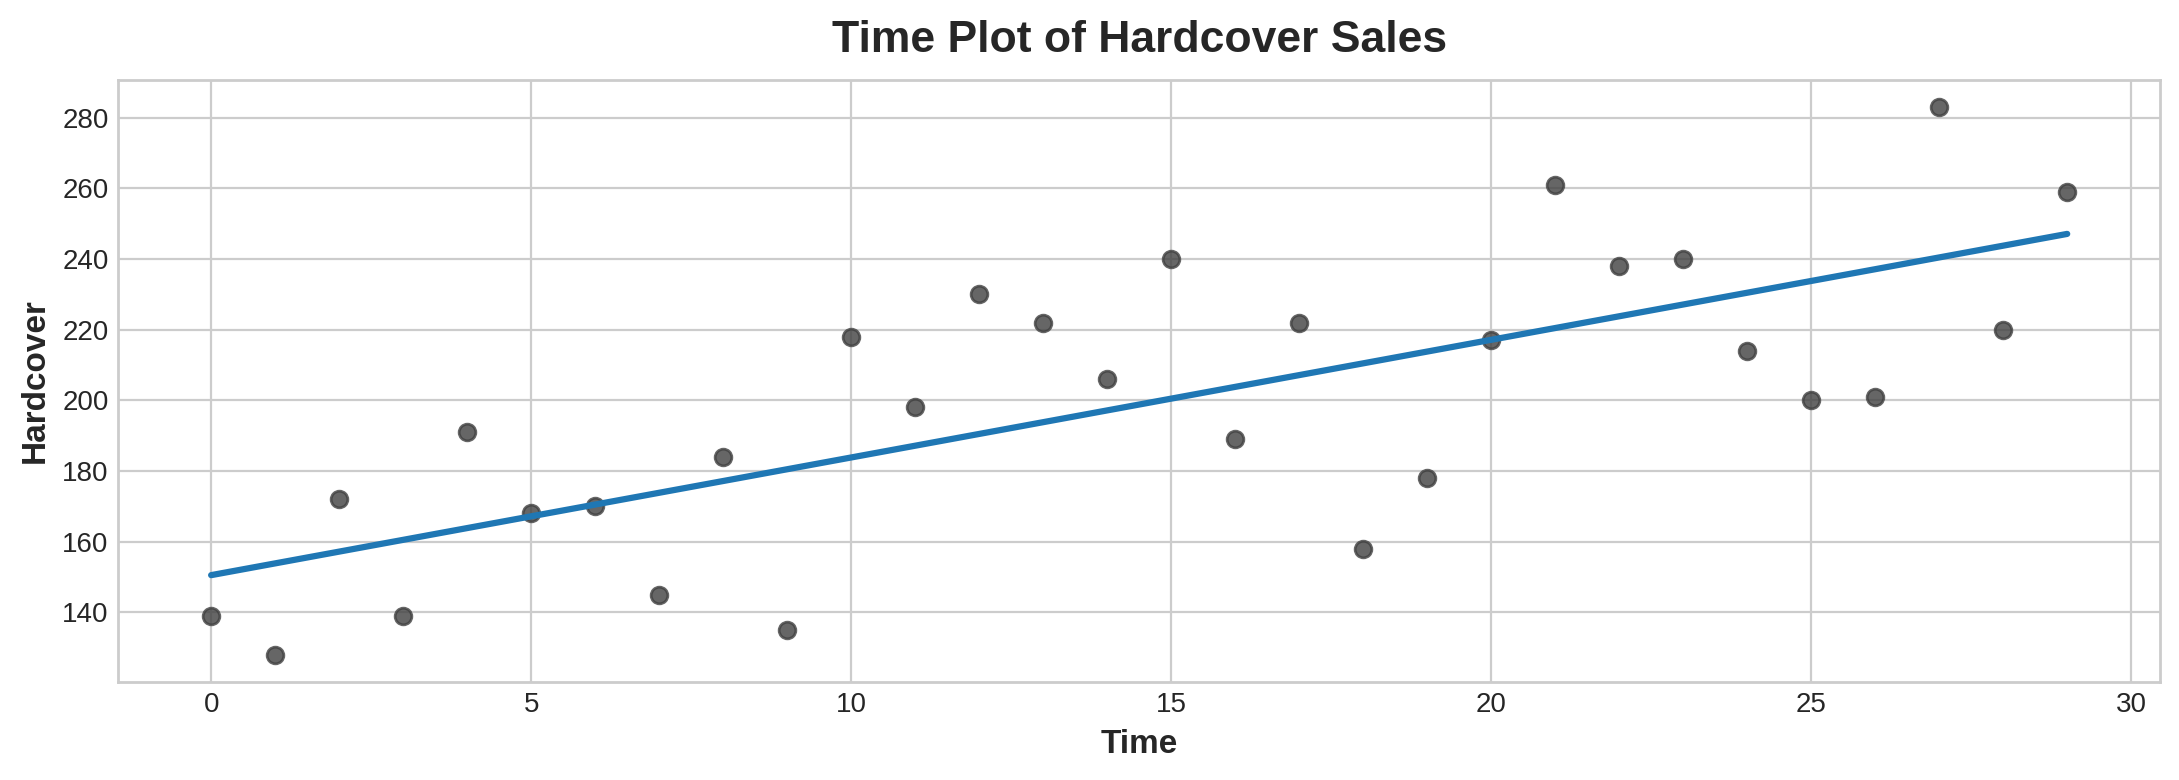

In [4]:
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
#ax.plot('Time', 'Hardcover', data=df, color='0.75')
ax = sns.regplot(x='Time', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25')) #ci: confidence interval (% within true mean), scatter_kws: additional keyword arg.
ax.set_title('Time Plot of Hardcover Sales')

**2. Lag Features:**

**target = weight * lag + bias**

In [5]:
df['Lag_1']=df['Hardcover'].shift(1) #shift by 1-step to right
df.head()

Hardcover  Time  Lag_1
Date                              
2000-04-01        139     0    NaN
2000-04-02        128     1  139.0
2000-04-03        172     2  128.0
2000-04-04        139     3  172.0
2000-04-05        191     4  139.0

In [6]:
df=df.reindex(columns=['Hardcover', 'Lag_1']) #set column order
df.head()

Hardcover  Lag_1
Date                        
2000-04-01        139    NaN
2000-04-02        128  139.0
2000-04-03        172  128.0
2000-04-04        139  172.0
2000-04-05        191  139.0

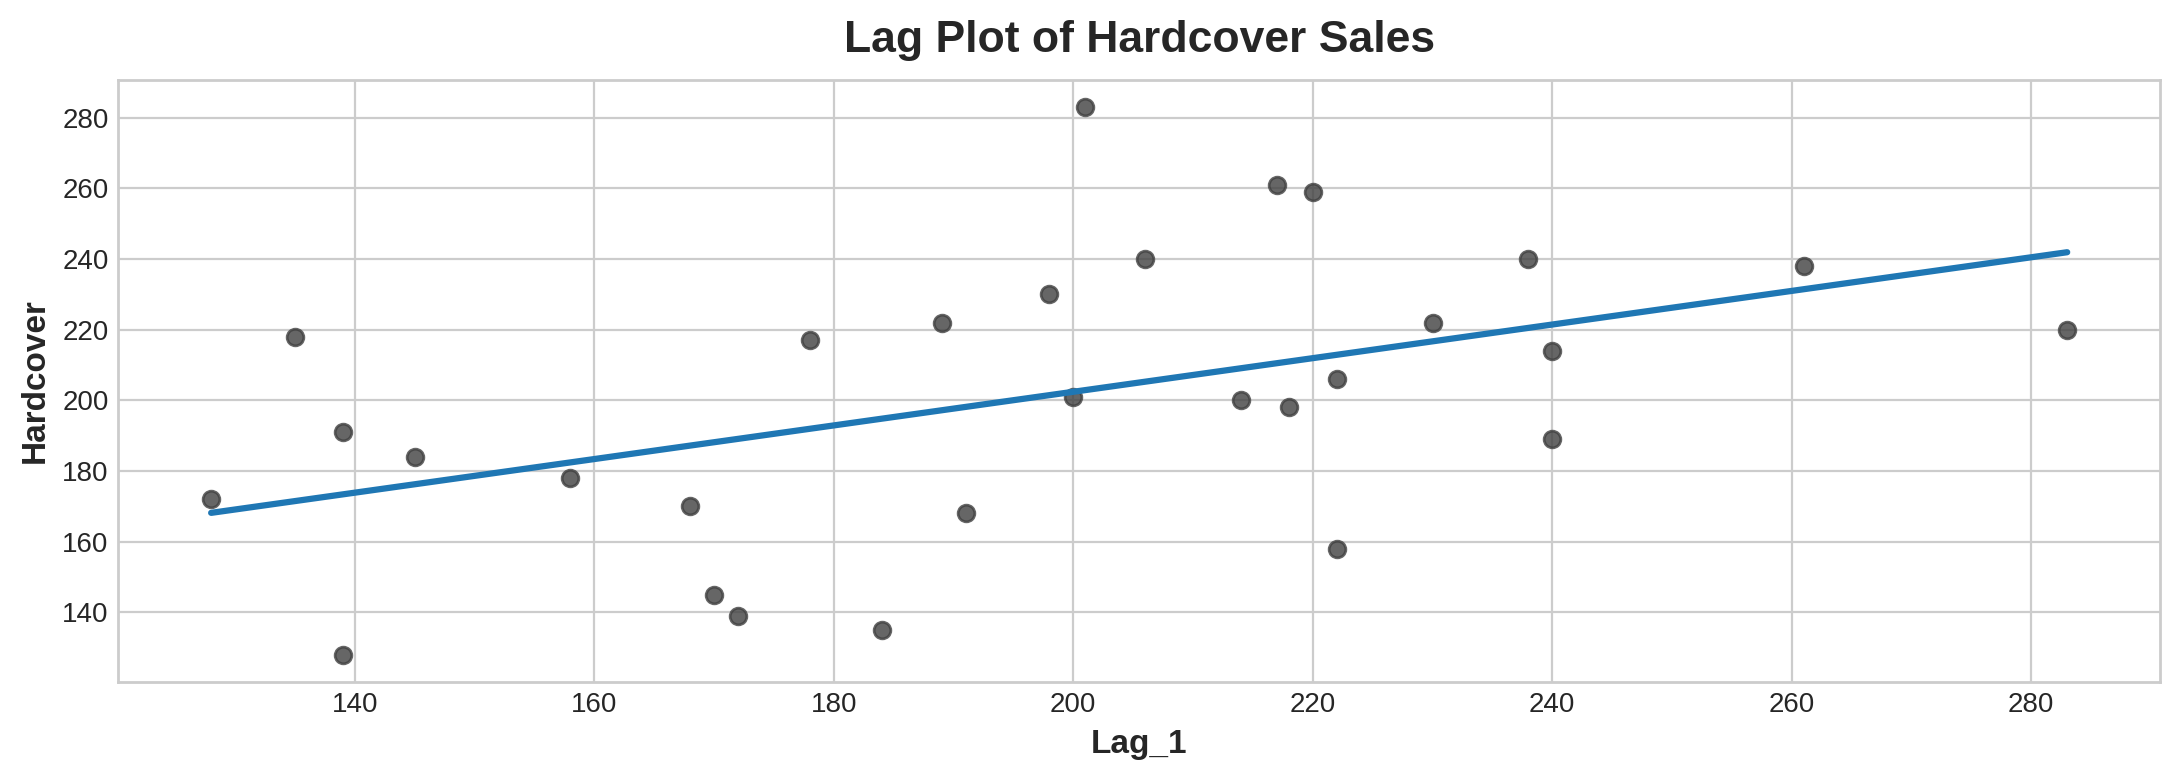

In [7]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
#ax.set_aspect('equal') #square plot
ax.set_title('Lag Plot of Hardcover Sales');

**Remarks:**

Lag features let us model 'serial dependence'. A time series has serial dependence when an observation can be predicted from previous observations.

Example: High sales on 'one-day' usually mean high sales on the next day.

Adapting ML algorithms to 'Time Series' problems is largely about 'Feature Engineering' with the **time index** and **lags**.

In [8]:
import numpy as np

# Creating datetime64 objects
dt1 = np.datetime64('2022-01-01')
dt2 = np.datetime64('2022-01-01T12:00:00')

# Arithmetic operations
dt3 = dt1 + np.timedelta64(7, 'D')

print(dt3)


2022-01-08


**Tunnel Traffic:**

Tunnel Traffic is a time series describing the number of vehicles traveling through the Baregg Tunnel in Switzerland each day from November 2003 to November 2005.

**Objective**: Apply *Linear Regression* to *time-step* features & *lag features*.

In [44]:
#import libraries

import matplotlib.pyplot as plt #data visualization
import numpy as np #numerical operations
import pandas as pd #data frames and time series data

simplefilter("ignore")  #ignore warnings to clean up output cells

# set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
#create dict
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina' #better display for high DPI screen

# load Tunnel Traffic dataset
tunnel = pd.read_csv("tunnel.csv", parse_dates=["Day"])
tunnel

Day  NumVehicles
0   2003-11-01       103536
1   2003-11-02        92051
2   2003-11-03       100795
3   2003-11-04       102352
4   2003-11-05       106569
..         ...          ...
742 2005-11-12       104646
743 2005-11-13        94424
744 2005-11-14       112165
745 2005-11-15       114296
746 2005-11-16       114690

[747 rows x 2 columns]

In [45]:

# Create a time series in Pandas by setting the index to a date
# column. We parsed "Day" as a date type by using `parse_dates` when
# loading the data.
tunnel = tunnel.set_index("Day")

# by default, Pandas creates a `DatetimeIndex` with dtype `Timestamp`
# (equivalent to `np.datetime64`, representing a time series as a
# sequence of measurements taken at single moments. A `PeriodIndex`,
# on the other hand, represents a time series as a sequence of
# quantities accumulated over periods of time.
tunnel = tunnel.to_period()  #time series as a seq. of quantities

tunnel.head()

NumVehicles
Day                    
2003-11-01       103536
2003-11-02        92051
2003-11-03       100795
2003-11-04       102352
2003-11-05       106569

**Time-step Features:**

In [46]:
df=tunnel.copy()
df['Time']=np.arange(len(tunnel.index))
df.head()

NumVehicles  Time
Day                          
2003-11-01       103536     0
2003-11-02        92051     1
2003-11-03       100795     2
2003-11-04       102352     3
2003-11-05       106569     4

**Fit Linear Regression Model:**

In [50]:
# training data
X = df.loc[:, ['Time']]  # features - pd.df
y = df.loc[:, 'NumVehicles']  # target -pd.series

# train the LR model
model = LinearRegression()
model.fit(X, y)

# store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)
y_pred
print(f'slope: {model.coef_[0]}')
print(f'intercept: {model.intercept_}')

slope: 22.49744953347821
intercept: 98176.20634409295


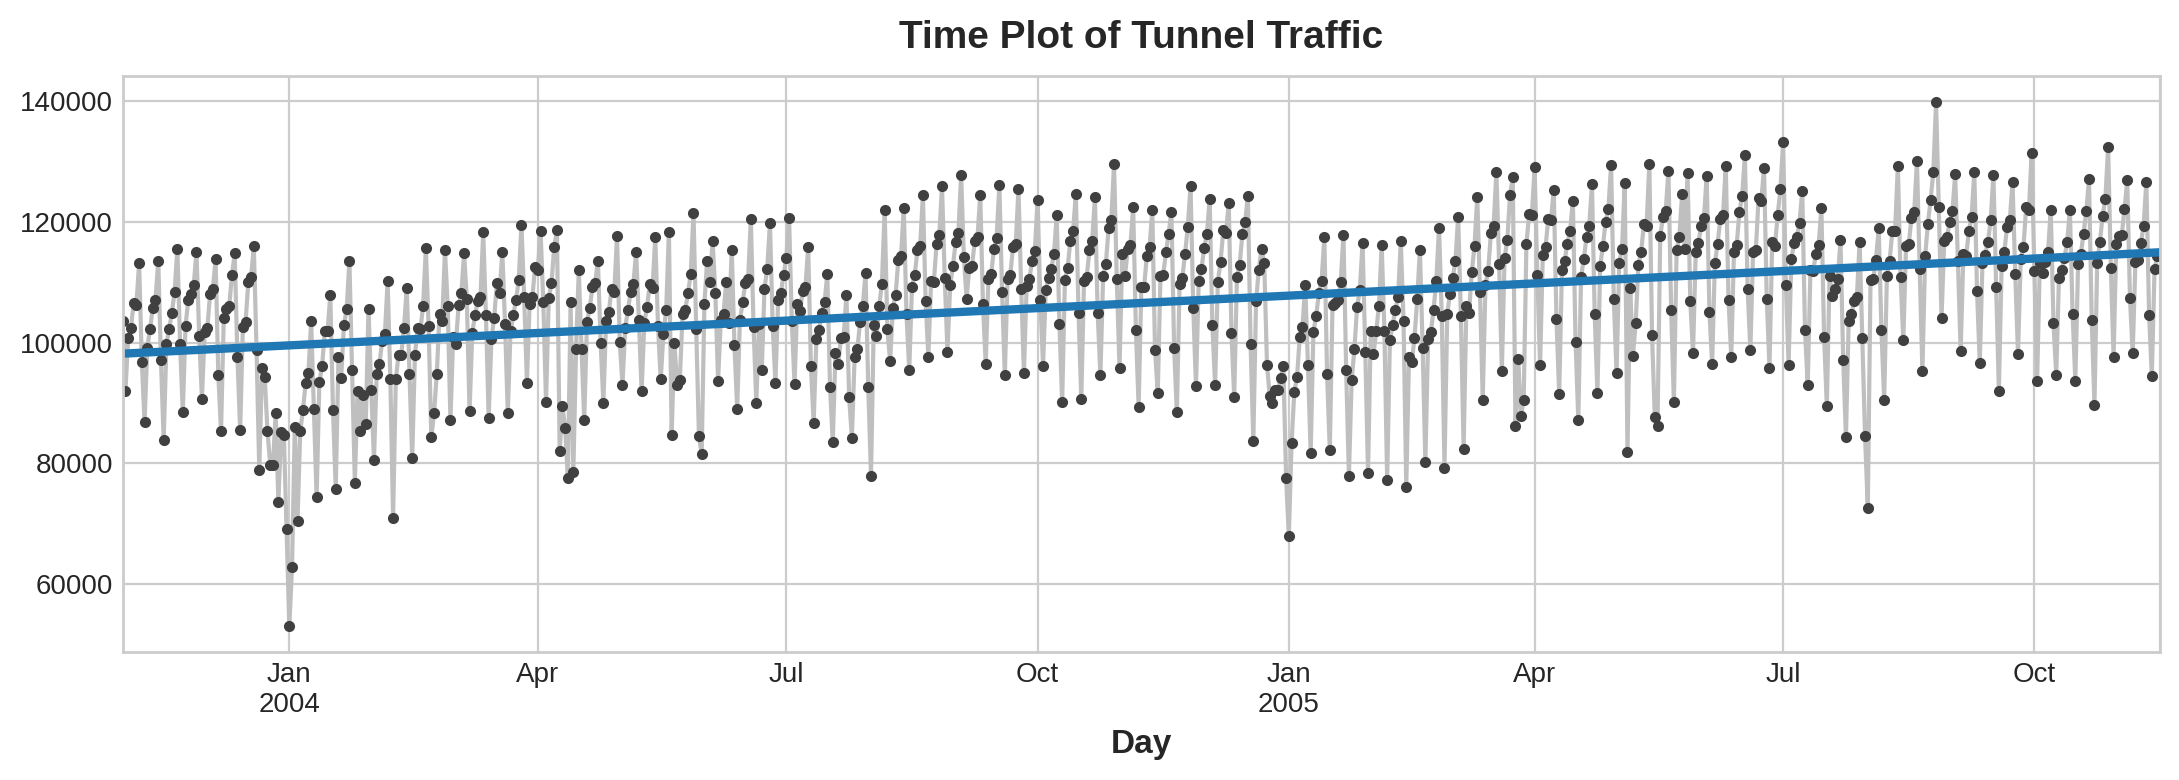

In [49]:
#time plot of tunnel traffic
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic');

**Lag Feature:**

In [51]:
df['Lag_1'] = df['NumVehicles'].shift(1)
df.head()
#handle missing values: '0', 'fill with 1st known value', 'drop the missing values also drop values in target' , 'mean-imputer'

NumVehicles  Time     Lag_1
Day                                    
2003-11-01       103536     0       NaN
2003-11-02        92051     1  103536.0
2003-11-03       100795     2   92051.0
2003-11-04       102352     3  100795.0
2003-11-05       106569     4  102352.0

In [67]:
X = df.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'NumVehicles']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target, 'inner': keep only the common indices

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
y_pred

Day
2003-11-02    104961.799284
2003-11-03     98840.684037
2003-11-04    103500.939302
2003-11-05    104330.767464
2003-11-06    106578.285356
                  ...      
2005-11-12    117280.776890
2005-11-13    105553.391615
2005-11-14    100105.412508
2005-11-15    109560.763451
2005-11-16    110696.514134
Freq: D, Length: 746, dtype: float64

In [69]:
y

Day
2003-11-02     92051
2003-11-03    100795
2003-11-04    102352
2003-11-05    106569
2003-11-06    106284
               ...  
2005-11-12    104646
2005-11-13     94424
2005-11-14    112165
2005-11-15    114296
2005-11-16    114690
Freq: D, Name: NumVehicles, Length: 746, dtype: int64

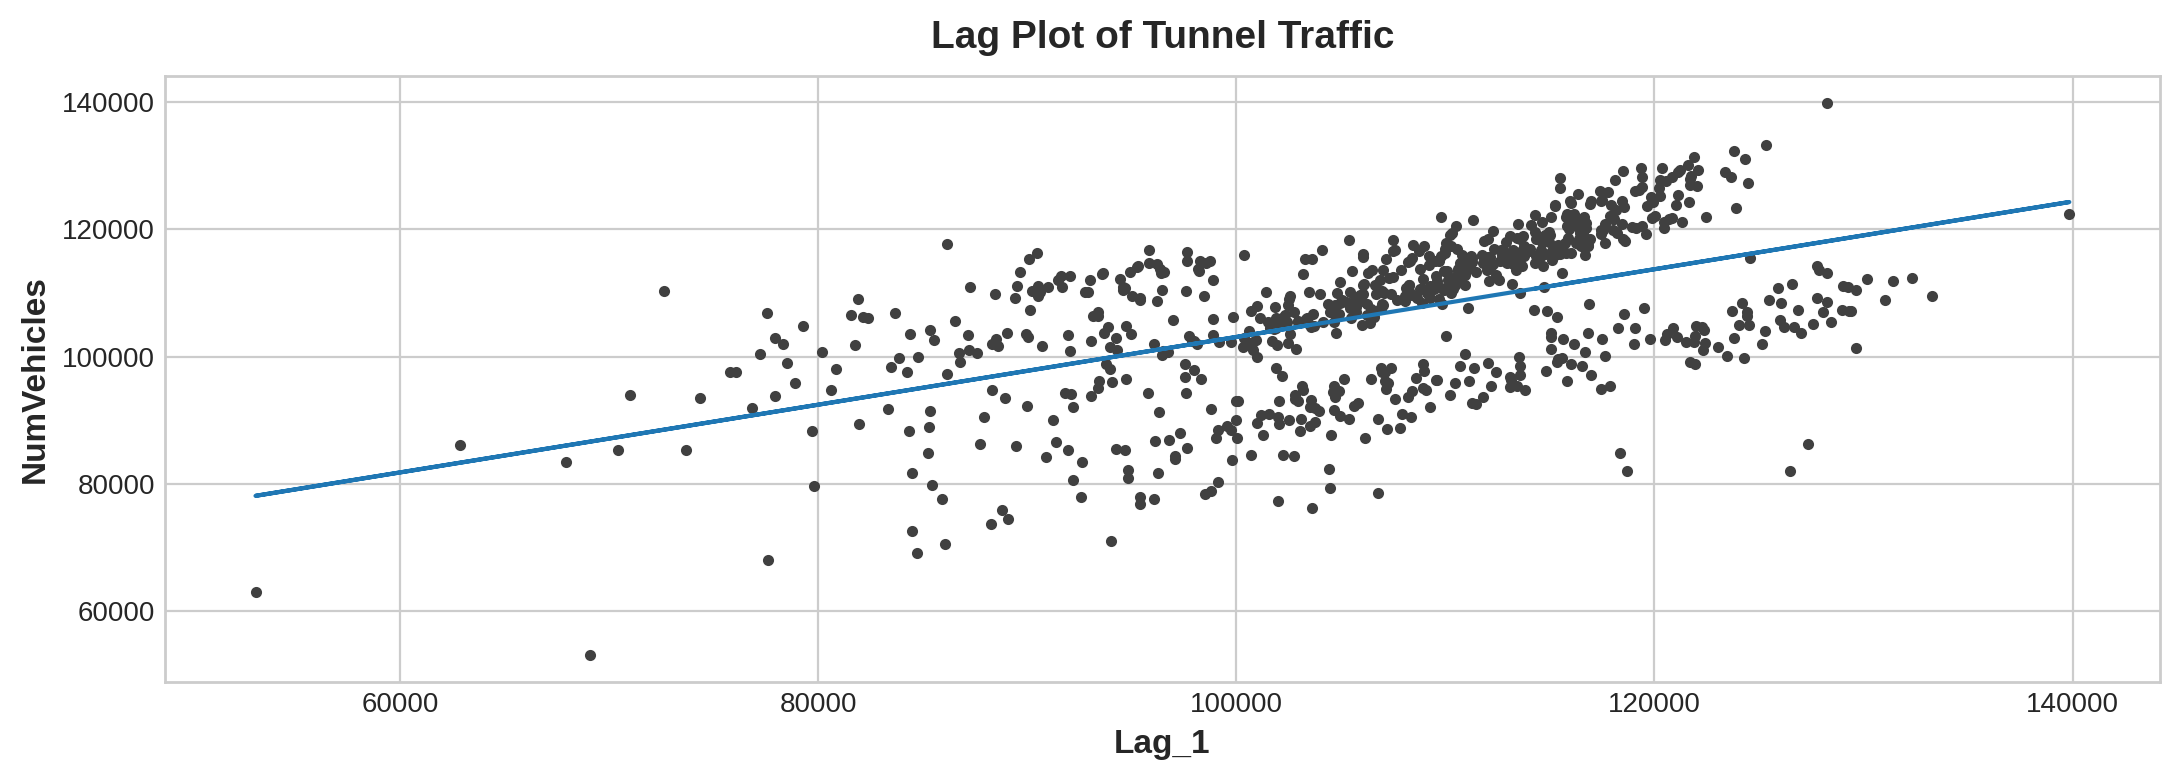

In [61]:
#lag plot of tunnel traffic
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic');

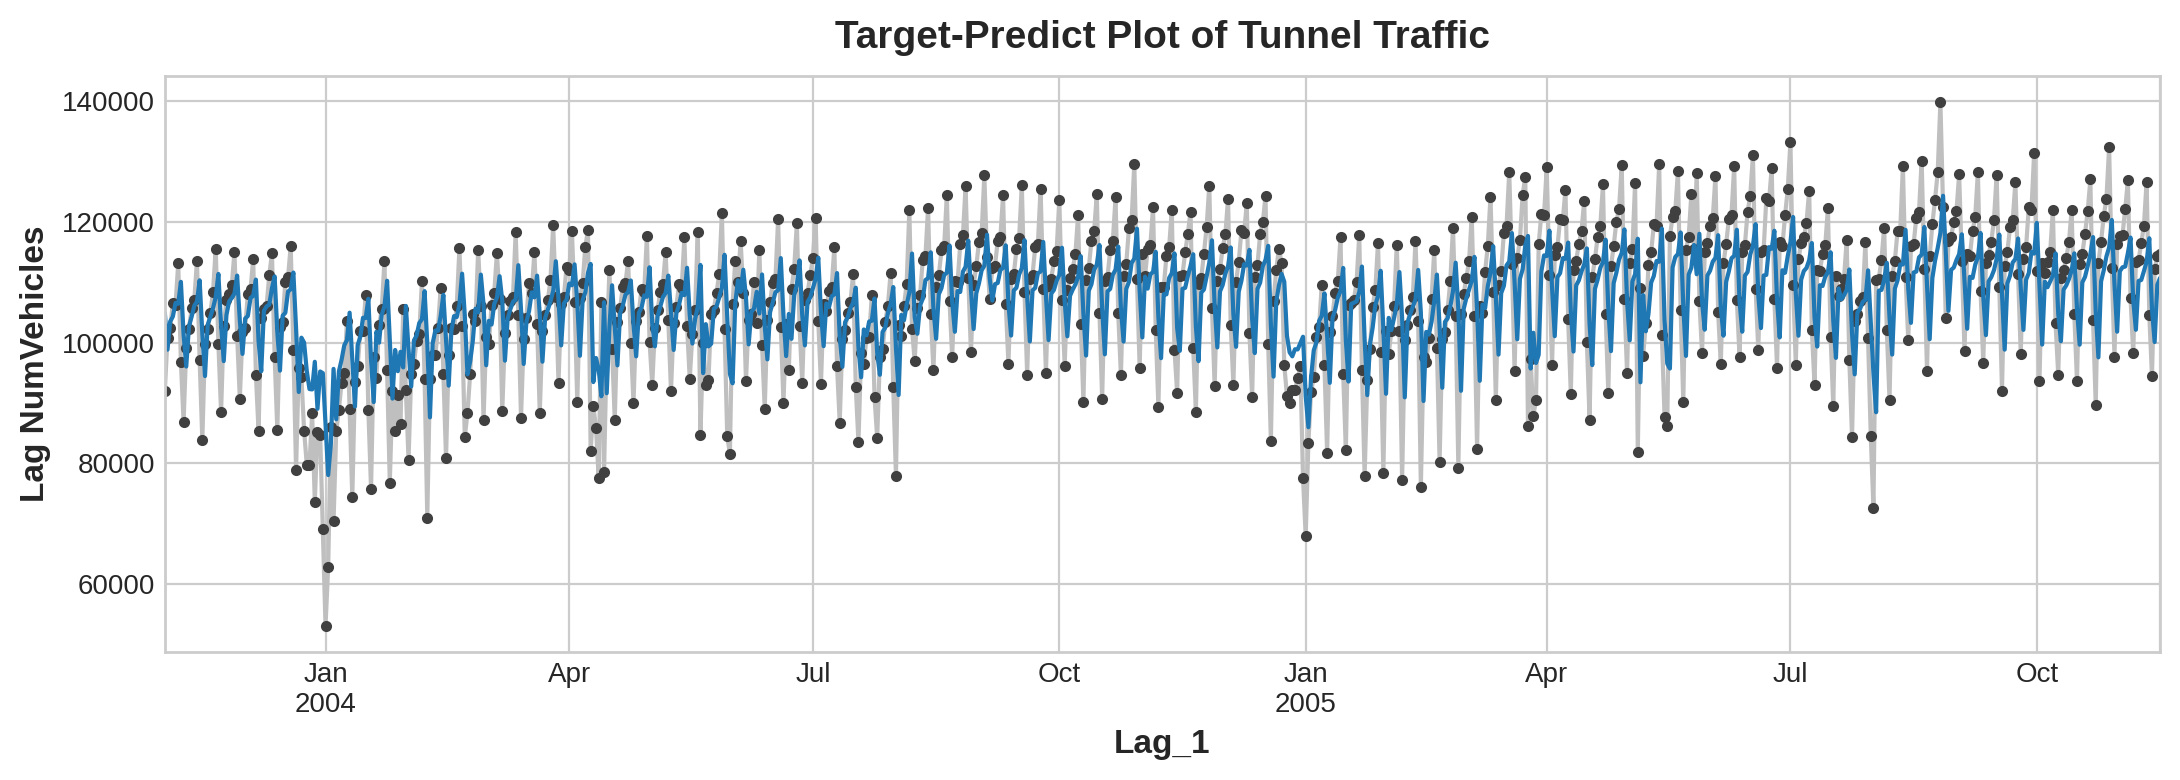

In [71]:
ax = y.plot(**plot_params) #target
ax = y_pred.plot()  #predict
ax.set_ylabel('Lag NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Target-Predict Plot of Tunnel Traffic');